In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import os

In [9]:
# Set seaborn style
sns.set(style="whitegrid")
colors = sns.color_palette("muted")
class_labels = {0: 'Electricity', 1: 'Chilled Water', 2: 'Steam', 3: 'Hot Water'}

# EDA

In [11]:
#Load
base_path = r"C:\Users\imate\Documents\24.9.Notebooks_training\Energy-predictor\data\0_raw"
train_file = os.path.join(base_path, "0_merged_train.csv")
train_df=pd.read_csv(train_file)
#Describe
train_df['meter_reading'].describe()

count    262305.000000
mean        181.936208
std         299.968978
min           0.000000
25%           9.250000
50%          29.180000
75%         247.000000
max        1106.100000
Name: meter_reading, dtype: float64

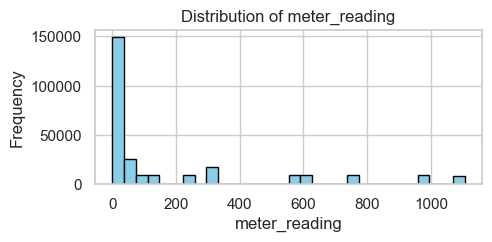

In [12]:
def plot_histogram(data, column_name, num_bins=30, color='skyblue', edgecolor='black', figsize=(5, 2)):
    """
    Generate a histogram for the specified column in the DataFrame.
    
    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column for which the histogram is to be generated.
        num_bins (int): Number of bins in the histogram.
        color (str): Color of the histogram bars.
        edgecolor (str): Color of the edges of the bars.
        figsize (tuple): Size of the figure (width, height).
    """
    plt.figure(figsize=figsize)
    plt.hist(data[column_name], bins=num_bins, color=color, edgecolor=edgecolor)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(train_df, 'meter_reading')

In [13]:
# Perform log transformation
train_df['log_' + 'meter_reading'] = np.log1p(train_df['meter_reading'])  

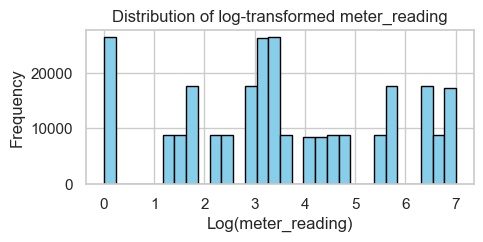

In [14]:
def plot_log_transformed_histogram(data, column_name, num_bins=30, color='skyblue', edgecolor='black', figsize=(5, 2)):
    """
    Generate a histogram for the log-transformed specified column in the DataFrame.
    
    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be log-transformed and plotted.
        num_bins (int): Number of bins in the histogram.
        color (str): Color of the histogram bars.
        edgecolor (str): Color of the edges of the bars.
        figsize (tuple): Size of the figure (width, height).
    """
    log_transformed_column = 'log_' + column_name
    data[log_transformed_column] = np.log1p(data[column_name])  # Log-transform the specified column
    
    plt.figure(figsize=figsize)
    plt.hist(data[log_transformed_column], bins=num_bins, color=color, edgecolor=edgecolor)
    plt.title(f'Distribution of log-transformed {column_name}')
    plt.xlabel('Log(' + column_name + ')')
    plt.ylabel('Frequency')
    plt.show()

plot_log_transformed_histogram(train_df, 'meter_reading')

In [15]:
train_df['log_meter_reading'].describe()

count    262305.000000
mean          3.603006
std           2.026340
min           0.000000
25%           2.327278
50%           3.407179
75%           5.513429
max           7.009499
Name: log_meter_reading, dtype: float64

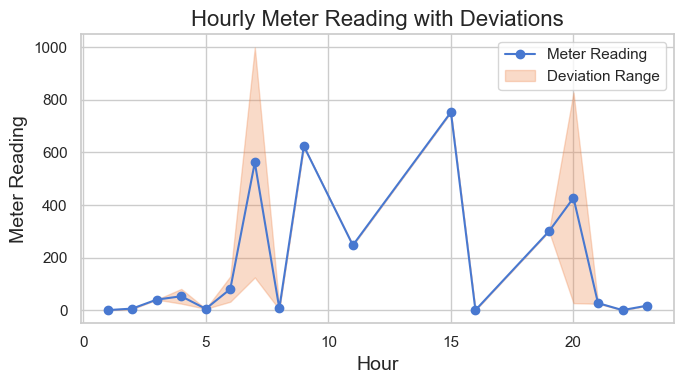

In [16]:

def plot_hourly_meter_reading_with_deviations(train_df):
    """
    Plot hourly meter readings with shaded region representing standard deviations.
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with a datetime index and 'meter_reading' column.
        figsize (tuple): Size of the figure (width, height).
        colors (list): List of color values for the plot (default is None, which uses default colors).
    """
    
    # Calculate mean and standard deviation for each hour
    hourly_stats = train_df['meter_reading'].groupby(train_df.hour).agg(['mean', 'std'])
    # Extract hours, mean values, and standard deviations
    hours = hourly_stats.index
    mean_values = hourly_stats['mean']
    std_devs = hourly_stats['std']

    # Plotting the data with a shaded region representing standard deviations
    plt.figure(figsize=(7, 4))
    plt.plot(hours, mean_values, marker='o', color=colors[0], label='Meter Reading')
    plt.fill_between(hours, mean_values - std_devs, mean_values + std_devs, color=colors[1], alpha=0.3, label='Deviation Range')
    plt.title('Hourly Meter Reading with Deviations', fontsize=16)
    plt.xlabel('Hour', fontsize=14)
    plt.ylabel('Meter Reading', fontsize=14)
    plt.xticks(np.arange(0, 24, 5))  # Show ticks for each hour
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_hourly_meter_reading_with_deviations(train_df)

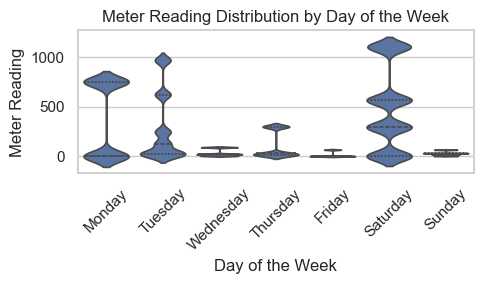

In [17]:
def plot_meter_reading_by_day(train_df):
    """
    Plot meter reading distribution by day of the week using a violin plot.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with a datetime index and 'meter_reading' column.
    """
    # Extract day of the week from the datetime index
    train_df['day_of_week'] = train_df.dayofweek
    # Set the order of days for proper plotting
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Create a violin plot for each day of the week
    plt.figure(figsize=(5, 3))
    sns.violinplot(data=train_df, x="day_of_week", y="meter_reading",density_norm="width",inner="quartile")
    plt.title('Meter Reading Distribution by Day of the Week', fontsize=12)
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Meter Reading', fontsize=12)
    plt.xticks(ticks=range(len(day_order)), labels=day_order, rotation=45)
    plt.tight_layout()
    plt.show()
    
plot_meter_reading_by_day(train_df)


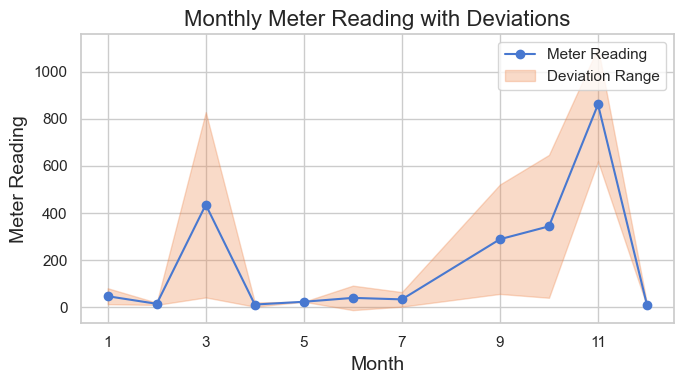

In [18]:
def plot_hourly_meter_reading_with_deviations(train_df):
    """
    Plot hourly meter readings with shaded region representing standard deviations.
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with a datetime index and 'meter_reading' column.
        figsize (tuple): Size of the figure (width, height).
        colors (list): List of color values for the plot (default is None, which uses default colors).
    """
    
    # Calculate mean and standard deviation for each hour
    m_stats = train_df['meter_reading'].groupby(train_df.month).agg(['mean', 'std'])
    # Extract hours, mean values, and standard deviations
    months = m_stats.index
    mean_values = m_stats['mean']
    std_devs = m_stats['std']

    # Plotting the data with a shaded region representing standard deviations
    plt.figure(figsize=(7, 4))
    plt.plot(months, mean_values, marker='o', color=colors[0], label='Meter Reading')
    plt.fill_between(months, mean_values - std_devs, mean_values + std_devs, color=colors[1], alpha=0.3, label='Deviation Range')
    plt.title('Monthly Meter Reading with Deviations', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Meter Reading', fontsize=14)
    plt.xticks(np.arange(1, 13, 2))  # Show ticks for each hour
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_hourly_meter_reading_with_deviations(train_df)

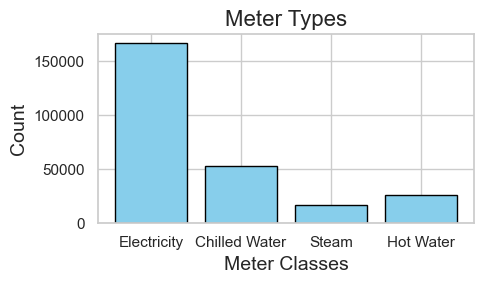

In [19]:

def plot_meter_classes(train_df, class_labels):
    """
    Plot a histogram of meter classes with specified class labels.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with a 'meter' column.
        class_labels (dict): Dictionary mapping meter classes to corresponding names.
    """
    # Map the class labels to the 'meter' column and create a new column 'meter_class'
    train_df['meter_class'] = train_df['meter'].map(class_labels)

    # Create a histogram of meter classes
    plt.figure(figsize=(5, 3))
    plt.hist(train_df['meter'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5], align='mid', rwidth=0.8, color='skyblue', edgecolor='black')
    plt.title('Meter Types', fontsize=16)
    plt.xlabel('Meter Classes', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Set x-ticks in the middle of each class and label them
    plt.xticks(range(4), [class_labels[i] for i in range(4)])

    plt.tight_layout()
    plt.show()


plot_meter_classes(train_df, class_labels)

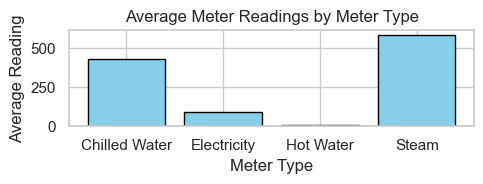

In [20]:

def average_meter_readings(train_df):
    # Calculate average meter readings by meter type
    average_meter_readings = train_df.groupby('meter_class')['meter_reading'].mean()

    # Create a histogram of average meter readings by meter type
    plt.figure(figsize=(5, 2))
    plt.bar(average_meter_readings.index, average_meter_readings.values, color='skyblue', edgecolor='black')
    plt.title('Average Meter Readings by Meter Type', fontsize=12)
    plt.xlabel('Meter Type', fontsize=12)
    plt.ylabel('Average Reading', fontsize=12)

    plt.tight_layout()
    plt.show()
    
average_meter_readings(train_df)

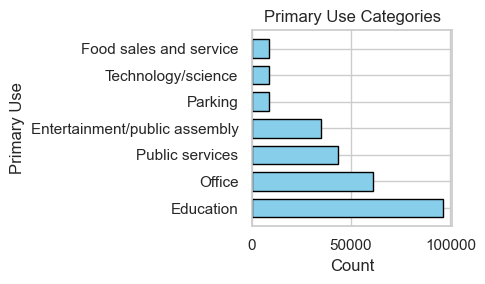

In [21]:

def plot_primary_use_categories_horizontal(train_df):
    """
    Plot a visually appealing horizontal bar histogram of primary use categories with spaces between bins.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with a 'primary_use' column.
    """
    # Count the occurrences of each primary use category
    primary_use_counts = train_df['primary_use'].value_counts()

    # Create a horizontal bar histogram of primary use categories with spaces between bins
    plt.figure(figsize=(5, 3))
    plt.barh(primary_use_counts.index, primary_use_counts.values, height=0.7, color='skyblue', edgecolor='black')
    plt.title('Primary Use Categories', fontsize=12)
    plt.ylabel('Primary Use', fontsize=12)
    plt.xlabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_primary_use_categories_horizontal(train_df)


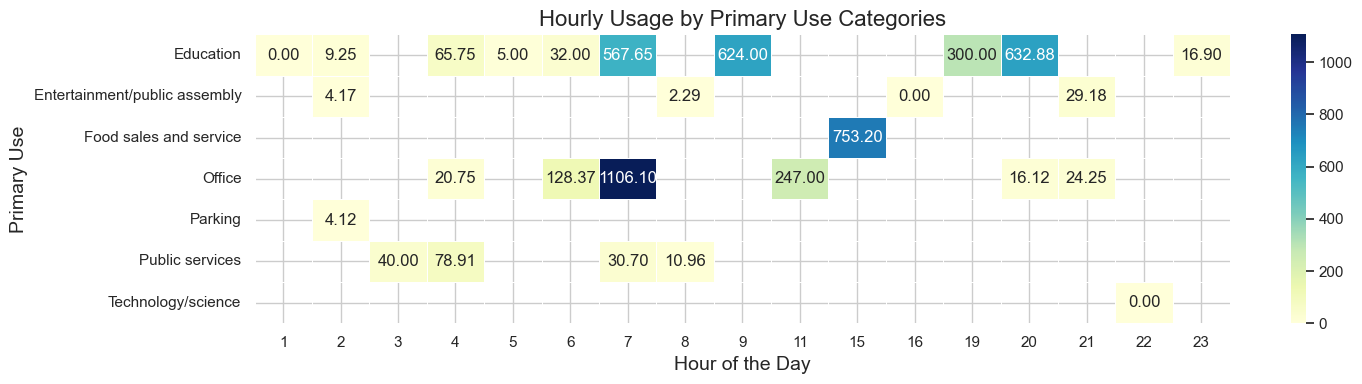

In [22]:
def hourly_usage_primary_use(train_df):
    # Pivot the data to get the hourly usage for each primary use category
    hourly_usage_by_primary_use = train_df.pivot_table(index='primary_use', columns=train_df.hour, values='meter_reading', aggfunc='mean')

    # Create a heatmap
    plt.figure(figsize=(15, 4))
    sns.heatmap(hourly_usage_by_primary_use, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
    plt.title('Hourly Usage by Primary Use Categories', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=14)
    plt.ylabel('Primary Use', fontsize=14)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
hourly_usage_primary_use(train_df)

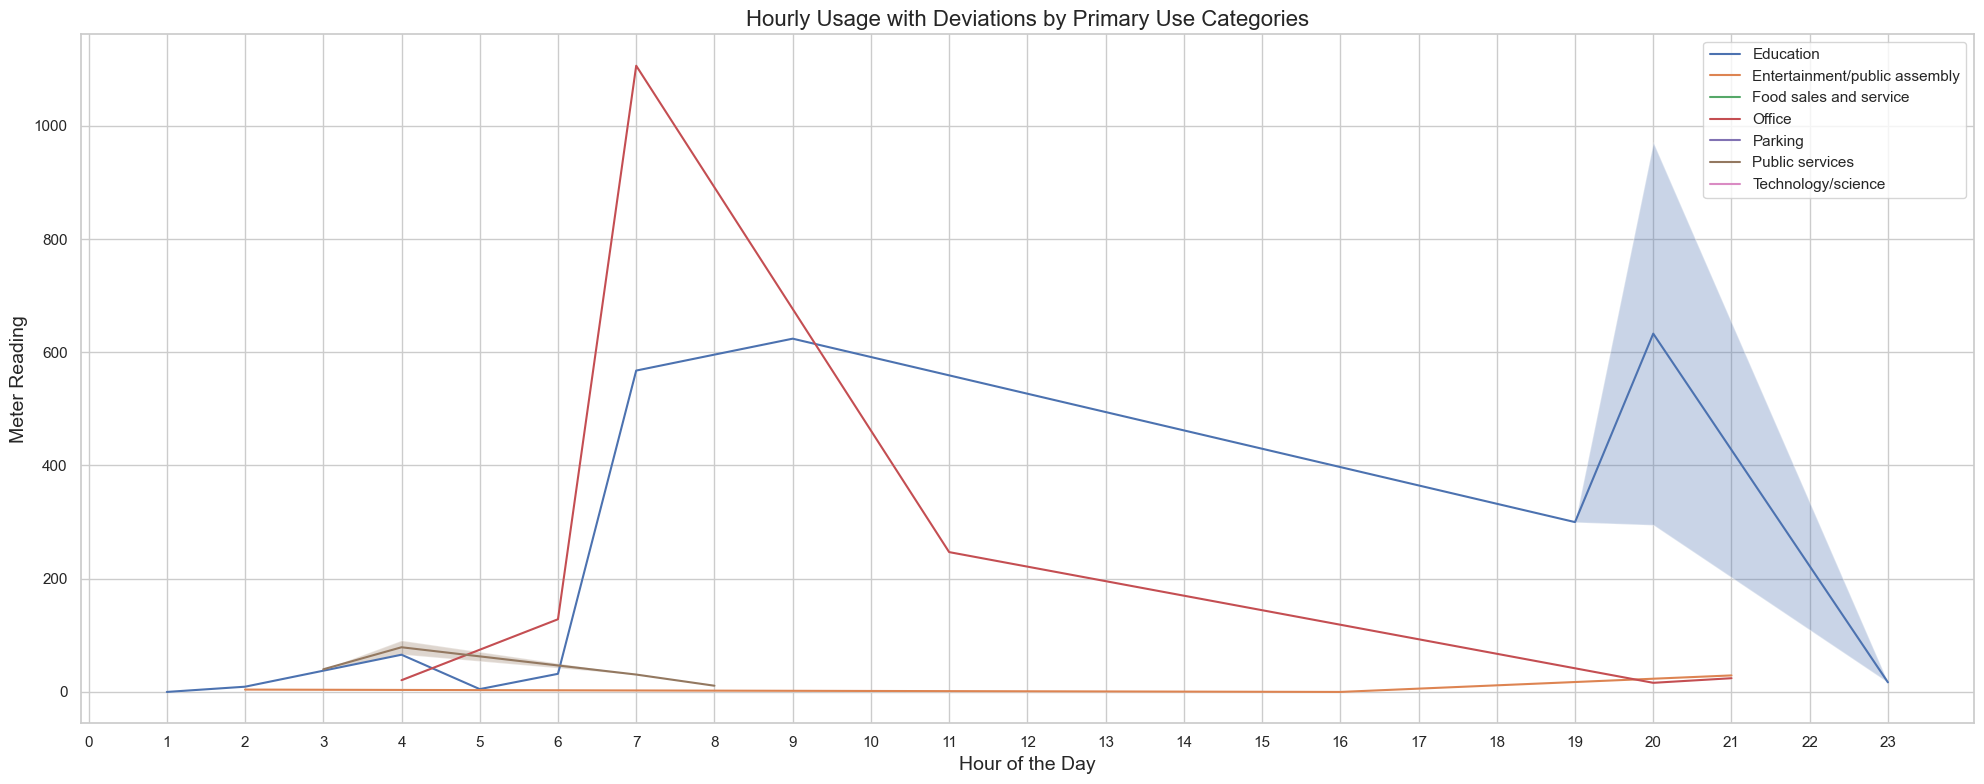

In [23]:
def plot_hourly_usage_with_deviations(train_df):
    """
    Plot line graphs with deviations for hourly usage for each primary use category.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'primary_use', 'meter_reading', and 'timestamp' columns.
    """
    # Calculate mean and standard deviation for each hour within each primary use category
    hourly_stats_by_primary_use = train_df.groupby(['primary_use', train_df.hour])['meter_reading'].agg(['mean', 'std'])

    # Plot line graphs with shaded regions representing deviations for each primary use category
    plt.figure(figsize=(20, 8))
    for primary_use_category, hourly_stats in hourly_stats_by_primary_use.groupby(level=0):
        plt.plot(hourly_stats.index.get_level_values(1), hourly_stats['mean'], label=primary_use_category)
        plt.fill_between(hourly_stats.index.get_level_values(1), hourly_stats['mean'] - hourly_stats['std'], 
                         hourly_stats['mean'] + hourly_stats['std'], alpha=0.3)

    plt.title('Hourly Usage with Deviations by Primary Use Categories', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=14)
    plt.ylabel('Meter Reading', fontsize=14)
    plt.legend()
    plt.xticks(range(24))
    plt.tight_layout()
    plt.show()

plot_hourly_usage_with_deviations(train_df)

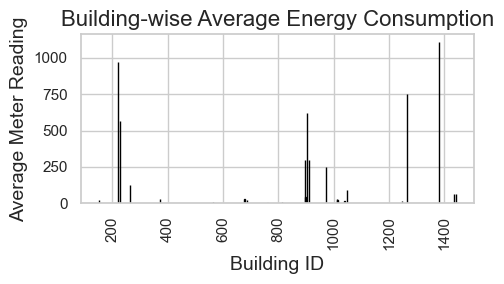

In [24]:
def plot_building_wise_energy_consumption(train_df):
    """
    Plot bar chart for building-wise average energy consumption.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'building_id' and 'meter_reading' columns.
    """
    # Calculate mean energy consumption for each building
    building_avg_energy = train_df.groupby('building_id')['meter_reading'].mean()

    # Sort buildings by average energy consumption in descending order
    building_avg_energy = building_avg_energy.sort_values(ascending=False)

    # Plot bar chart for building-wise average energy consumption
    plt.figure(figsize=(5, 3))
    plt.bar(building_avg_energy.index, building_avg_energy.values, color='skyblue', edgecolor='black')
    plt.title('Building-wise Average Energy Consumption', fontsize=16)
    plt.xlabel('Building ID', fontsize=14)
    plt.ylabel('Average Meter Reading', fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


plot_building_wise_energy_consumption(train_df)

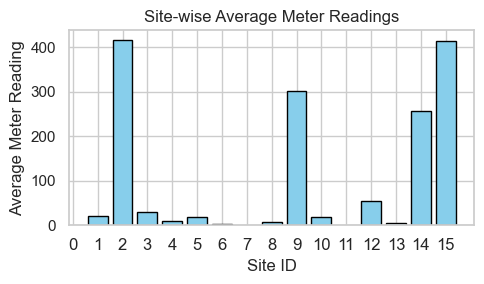

In [25]:
def plot_site_wise_average_meter_readings(train_df):
    """
    Plot bar chart for site-wise average meter readings.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'site_id' and 'meter_reading' columns.
    """
    # Calculate mean meter reading for each site
    site_avg_meter_readings = train_df.groupby('site_id')['meter_reading'].mean()

    # Plot bar chart for site-wise average meter readings
    plt.figure(figsize=(5, 3))
    plt.bar(site_avg_meter_readings.index, site_avg_meter_readings.values, color='skyblue', edgecolor='black')
    plt.title('Site-wise Average Meter Readings', fontsize=12)
    plt.xlabel('Site ID', fontsize=12)
    plt.ylabel('Average Meter Reading', fontsize=12)
    plt.xticks(range(16), fontsize=12)
    plt.tight_layout()
    plt.show()

plot_site_wise_average_meter_readings(train_df)

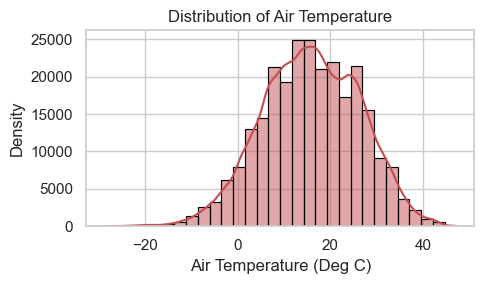

In [26]:
def plot_air_temperature_distribution(train_df):
    """
    Plot the distribution of air temperature using a histogram.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'air_temperature' column.
    """
    # Plot histogram for air temperature distribution
    plt.figure(figsize=(5, 3))
    sns.histplot(train_df['air_temperature'], bins=30, kde=True, color='r', edgecolor='black')
    #plt.hist(train_df['air_temperature'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Air Temperature', fontsize=12)
    plt.xlabel('Air Temperature (Deg C)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_air_temperature_distribution(train_df)

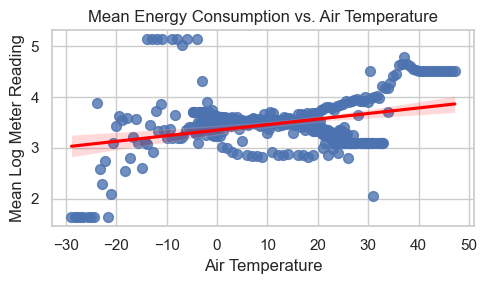

In [31]:
def plot_mean_energy_consumption_vs_air_temperature(train_df):
    """
    Plot the mean log-transformed meter readings against air temperature.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'log_meter_reading' and 'air_temperature' columns.
    """
    # Calculate mean log meter readings for each unique air temperature value
    mean_meter_readings = train_df.groupby('air_temperature')['log_meter_reading'].mean().reset_index()

    # Set style
    sns.set(style="whitegrid")
    
    # Plot scatter plot with regression line
    plt.figure(figsize=(5, 3))
    sns.regplot(x='air_temperature', y='log_meter_reading', data=mean_meter_readings, scatter_kws={'s': 50}, line_kws={'color':'red'})
    
    plt.title('Mean Energy Consumption vs. Air Temperature', fontsize=12)
    plt.xlabel('Air Temperature', fontsize=12)
    plt.ylabel('Mean Log Meter Reading', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_mean_energy_consumption_vs_air_temperature(train_df)

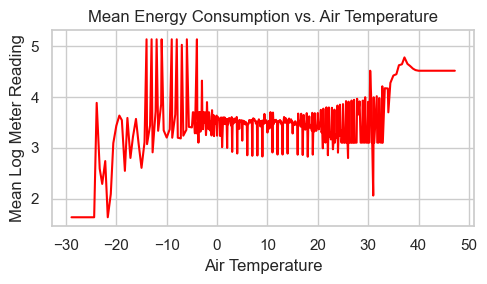

In [30]:
# different view
def plot_mean_energy_consumption_vs_air_temperature(train_df):
    """
    Plot the mean log-transformed meter readings against air temperature using a line graph.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'log_meter_reading' and 'air_temperature' columns.
    """
    # Calculate mean log meter readings for each unique air temperature value
    mean_meter_readings = train_df.groupby('air_temperature')['log_meter_reading'].mean().reset_index()

    # Set style
    sns.set(style="whitegrid")
    
    # Plot line graph
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='air_temperature', y='log_meter_reading', data=mean_meter_readings, color='red')
    
    plt.title('Mean Energy Consumption vs. Air Temperature', fontsize=12)
    plt.xlabel('Air Temperature', fontsize=12)
    plt.ylabel('Mean Log Meter Reading', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_mean_energy_consumption_vs_air_temperature(train_df)

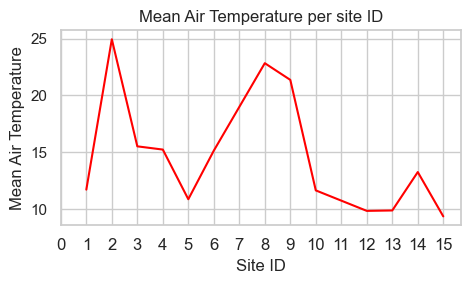

In [29]:
# different view
def plot_mean_energy_consumption_vs_air_temperature(train_df):
    """
    Plot the mean log-transformed meter readings against air temperature using a line graph.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'log_meter_reading' and 'air_temperature' columns.
    """
    # Calculate mean log meter readings for each unique air temperature value
    mean_air_temperature_by_site = train_df.groupby('site_id')['air_temperature'].mean().reset_index()

    # Set style
    sns.set(style="whitegrid")
    
    # Plot line graph
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='site_id', y='air_temperature', data=mean_air_temperature_by_site, color='red')
    
    plt.title('Mean Air Temperature per site ID', fontsize=12)
    plt.xlabel('Site ID', fontsize=12)
    plt.xticks(range(16), fontsize=12)
    plt.ylabel('Mean Air Temperature', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_mean_energy_consumption_vs_air_temperature(train_df)

### Distribution plots for the weather data:

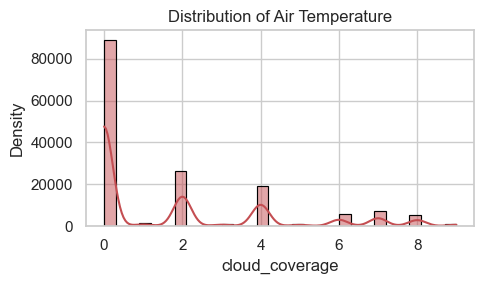

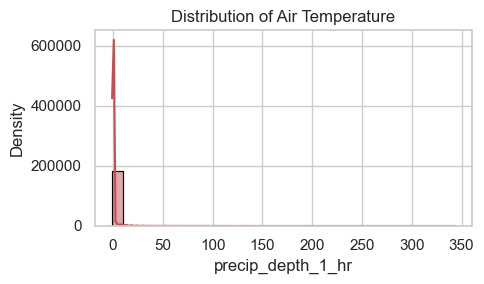

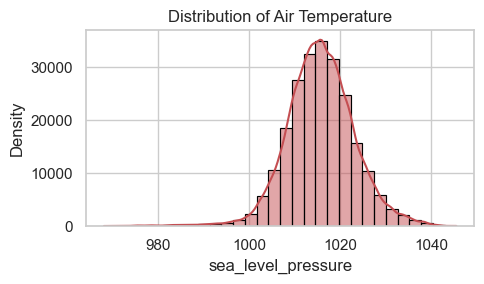

In [142]:
def plot_air_temperature_distribution(train_df,x):
    """
    Plot the distribution of air temperature using a histogram.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'air_temperature' column.
    """
    # Plot histogram for air temperature distribution
    plt.figure(figsize=(5, 3))
    sns.histplot(train_df[x], bins=30, kde=True, color='r', edgecolor='black')
    #plt.hist(train_df['air_temperature'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Air Temperature', fontsize=12)
    plt.xlabel(f'{x}', fontsize=12)
    #plt.xticks(range(16), fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_air_temperature_distribution(train_df,'cloud_coverage')
plot_air_temperature_distribution(train_df,'precip_depth_1_hr')
plot_air_temperature_distribution(train_df,'sea_level_pressure')


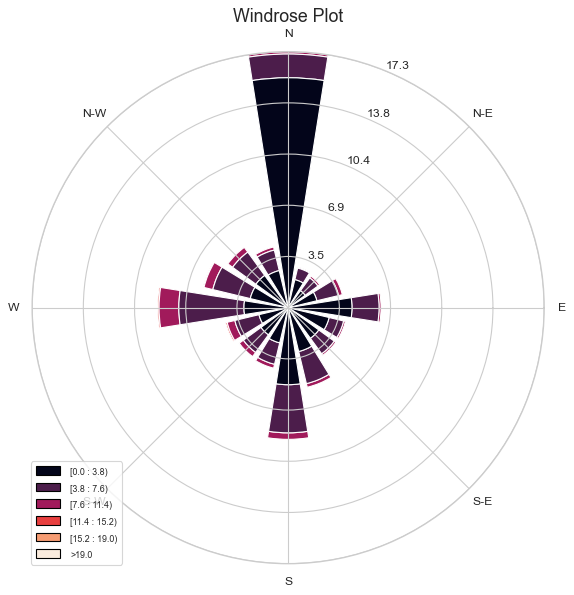

In [131]:
def plot_windrose(train_df):
    """
    Plot windrose using 'wind_direction' and 'wind_speed' data from train_df.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'wind_direction' and 'wind_speed' columns.
    """
    # Create a WindroseAxes object
    ax = WindroseAxes.from_ax()

    # Plot windrose using 'wind_direction' and 'wind_speed' data
    ax.bar(train_df['wind_direction'], train_df['wind_speed'], normed=True, opening=0.8, edgecolor='white')

    # Customize the windrose plot
    ax.set_legend()
    ax.set_title('Windrose Plot', fontsize=16)
    plt.show()

plot_windrose(train_df)

### Distributions of floor_count, square_feet and year_built



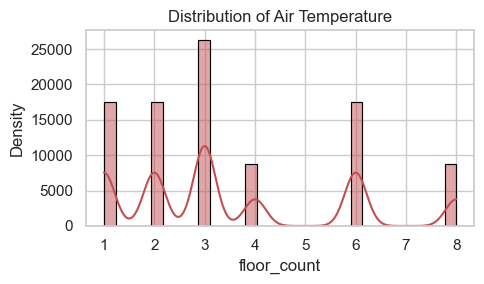

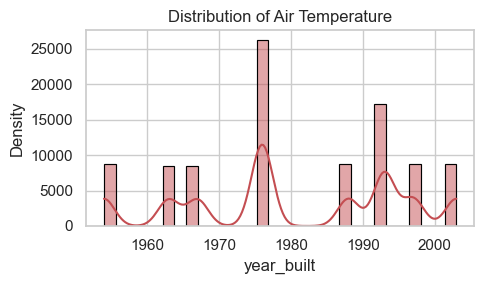

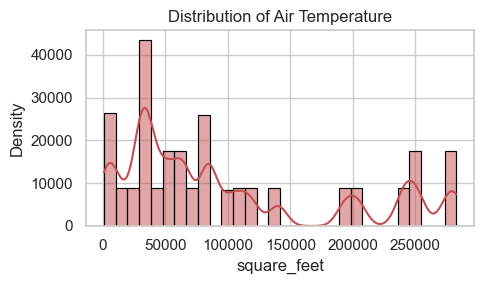

In [143]:
plot_air_temperature_distribution(train_df,'floor_count')
plot_air_temperature_distribution(train_df,'year_built')
plot_air_temperature_distribution(train_df,'square_feet')

### Comparison

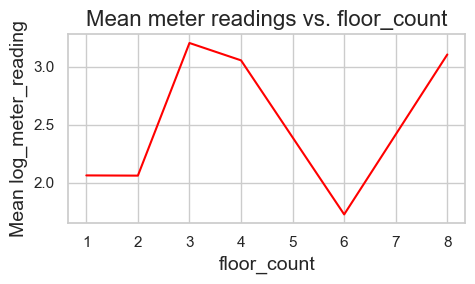

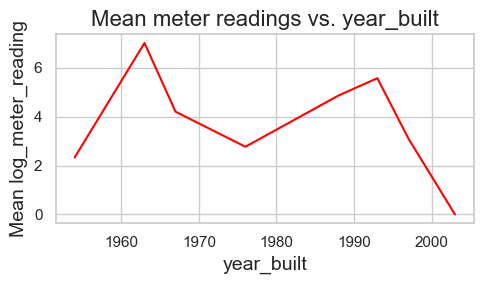

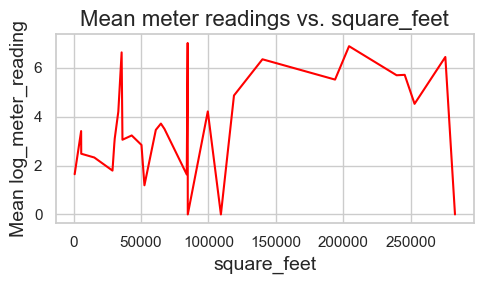

In [147]:
# different view
def plot_mean_energy_consumption_vs_air_temperature(train_df,x):
    """
    Plot the mean log-transformed meter readings against air temperature using a line graph.
    
    Parameters:
        train_df (pd.DataFrame): The DataFrame containing the data with 'log_meter_reading' and 'air_temperature' columns.
    """
    # Calculate mean log meter readings for each unique air temperature value
    mean_meter_readings = train_df.groupby(x)['log_meter_reading'].mean().reset_index()

    # Set style
    sns.set(style="whitegrid")
    
    # Plot line graph
    plt.figure(figsize=(5, 3))
    sns.lineplot(x=x, y='log_meter_reading', data=mean_meter_readings, color='red')
    
    plt.title(f'Mean meter readings vs. {x}', fontsize=16)
    plt.xlabel(f'{x}', fontsize=14)
    plt.ylabel('Mean log_meter_reading', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_mean_energy_consumption_vs_air_temperature(train_df,'floor_count')
plot_mean_energy_consumption_vs_air_temperature(train_df,'year_built')
plot_mean_energy_consumption_vs_air_temperature(train_df,'square_feet')

### Confusion Matrix

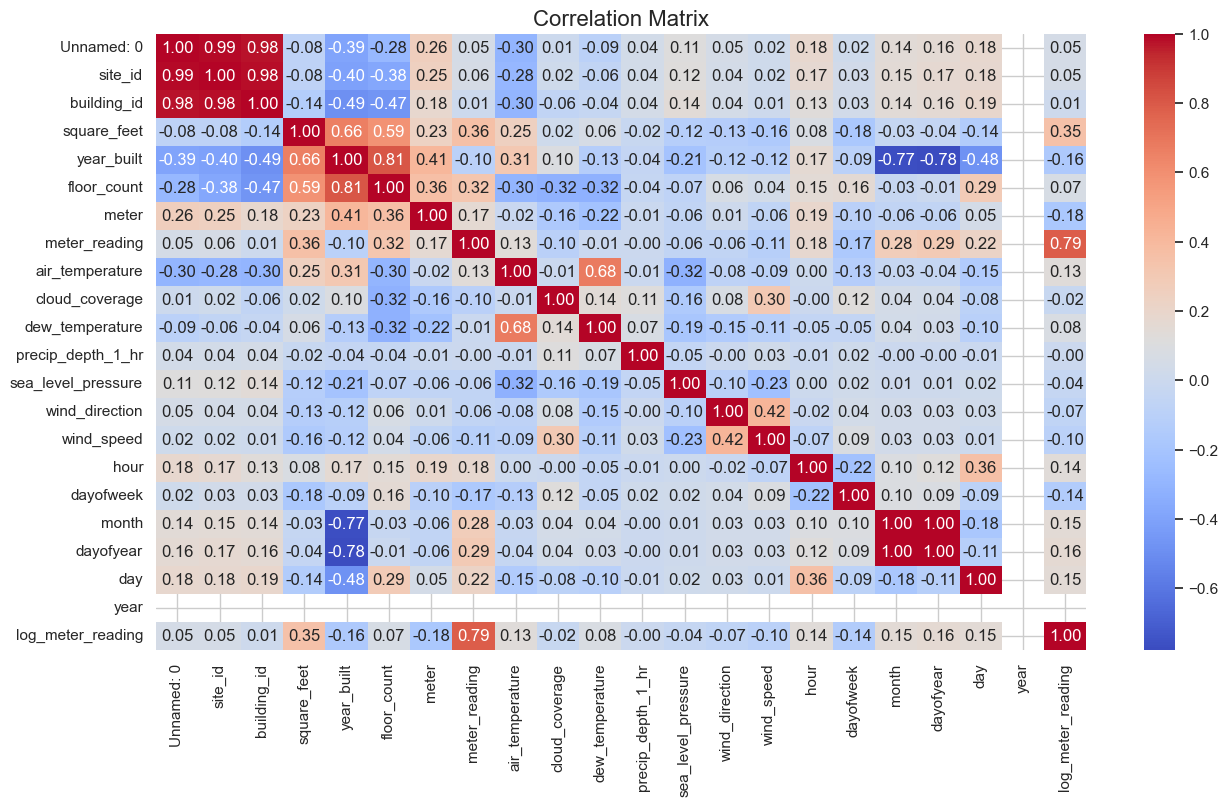

In [149]:
numeric_columns = train_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

- The square feet and floor count features have positive correlation with the target variable.

- As we know the size of the building is a huge factor on how much energy a building consumes. Year built is also having a positive correlation with the target variable as older buildings tend to consume more energy than the newer ones.